# **Customer Segmentation Notebook Showing Modeling Using Agglomerative Clustering**

### In this notebook, similar to the first modeling notebook we conducted with the KMeans modeling, we will utilize our previously scaled version of our dataframe so we can look at the customer clusters extracted based on the custom features that we have created.  In this notebook we will be utilizing and focusing on Agglomerative Clustering, and will see in the summary how it differs in the results.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

In [8]:
random_state = 42
np.random.seed(random_state)

#### Let's read in our saved dataframe so we can start to work with it here in this notebook again.

In [2]:
df_user_scaled = pd.read_csv(f'/Users/ryanm/Desktop/df-user-scaled.csv')


print(df_user_scaled.shape)
print(df_user_scaled.columns)
print(df_user_scaled.head())
print(df_user_scaled.isna().sum())

agg_scaled = df_user_scaled

(206209, 4)
Index(['order_dow_mean', 'order_hour_of_day_mean', 'time_between_purchases',
       'purchase_frequency'],
      dtype='object')
   order_dow_mean  order_hour_of_day_mean  time_between_purchases  \
0       -0.269018               -1.557111                0.764202   
1       -0.648385               -1.428500                0.110680   
2       -1.773842                1.341157               -0.396789   
3        2.174108               -0.467299               -0.188850   
4       -1.065689                1.143728               -0.266827   

   purchase_frequency  
0           -0.695052  
1           -0.392752  
2           -0.037030  
3           -0.200532  
4           -0.142563  
order_dow_mean            0
order_hour_of_day_mean    0
time_between_purchases    0
purchase_frequency        0
dtype: int64


#### The data imported has already been scaled using StandardScaler, which is appropriate for Agglomerative Clustering as well and also allows us to hold consistency across all of our clustering models.  PCA has already been applied with a n_components = 2 value in a previous notebook, though we will do so again so we can show the process and reacquire our key pca_features variable.

In [3]:
n_components = 2
pca_fit = PCA(n_components=n_components)
pca_features = pca_fit.fit_transform(agg_scaled)

#### Since Agglomerative Clustering doesn't benefit from elbow plots (as Agglomerative Clustering doesn't use Inertia-based criterion) we will now go into the silhouette plotting to see how many clusters there are in our dataframe based on the Agglomerative Clustering method.  One of the key differences in this clustering method is that we will be looking at 4 different linkage methods within Agglomerative Clustering (ward, complete, average, and single), so there will be repeated processes to obtain different insights.

In [9]:
linkage_methods = ['ward', 'complete', 'average', 'single']
silhouette_scores = {method: [] for method in linkage_methods}

sample_size = 15000

for method in linkage_methods:
    for n_clusters in range(2,11):
        sample_indices = np.random.choice(pca_features.shape[0], sample_size, replace = False)
        pca_sample = pca_features[sample_indices]
        agg = AgglomerativeClustering(n_clusters = n_clusters, linkage = method)
        cluster_labels = agg.fit_predict(pca_sample)
        silhouette_avg = silhouette_score(pca_sample, cluster_labels)
        silhouette_scores[method].append(silhouette_avg)

silhouette_agg_df = pd.DataFrame(silhouette_scores, index = range(2,11))

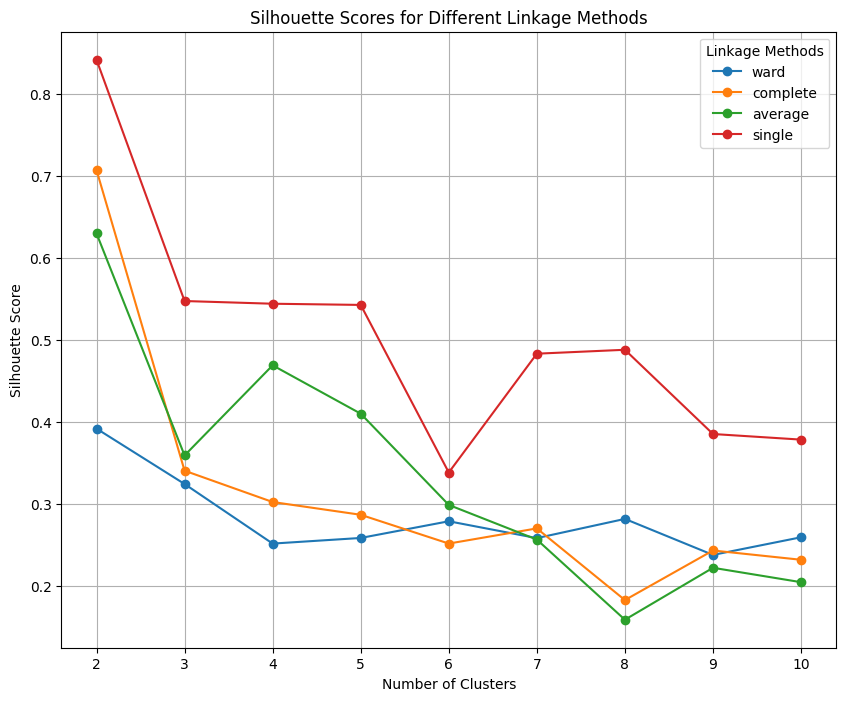

In [13]:
plt.figure(figsize = (10,8))
for method in linkage_methods:
    plt.plot(silhouette_agg_df.index, silhouette_agg_df[method], marker = 'o', label= method)

plt.title('Silhouette Scores for Different Linkage Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend(title = 'Linkage Methods')
plt.grid(True)
plt.show()

#### The above plot tells us quite a bit.  Overall we can see that the silhouette scores decrease as the number of clusters increase for each linkage method, so we should be looking for a smaller number of clusters independent of which linkage method we choose.  Single linkage in particular shows the highest silhouette scores, however for this project it is not ideal in that single linkage can create chain-like clusters that aren't necessarily compact which is what we are trying to establish with our customer groups.  The Average linkage method also has strong silhouette scores in the first few clusters defined, and produces clusters that are moderately compact.  Complete linkage only shows to have good scores at it's 2nd cluster, and beyond that its scores drop considerably.  Finally Ward linkage, while having some of the lower scores shows consistency across all plotted clusters; its scores aren't impressive but the key point about Ward linkage is that it tends to produce compact and relatively even-sized clusters which is a key focus for our project.  Before we choose a linkage method however we still need to look at other factors in our consideration such as cluster size (read population), their own relationships with each other, and several others as the silhouette scores themselves are not enough to determine which method is the one to choose yet.  Further analysis is needed. 

#### We will start the next phase of the analysis with plotting the actual silhouette plots for both Ward and Average linkage methods to get a better idea of the shape of the clusters.

Linkage method: ward
Silhouette score for n_clusters = 2: 0.3598


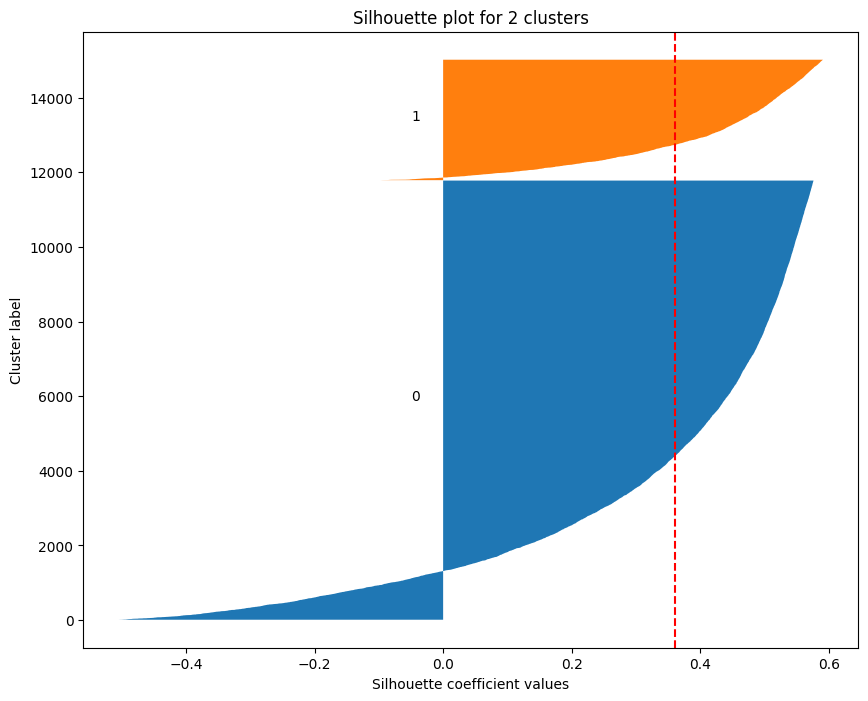

Silhouette score for n_clusters = 3: 0.3270


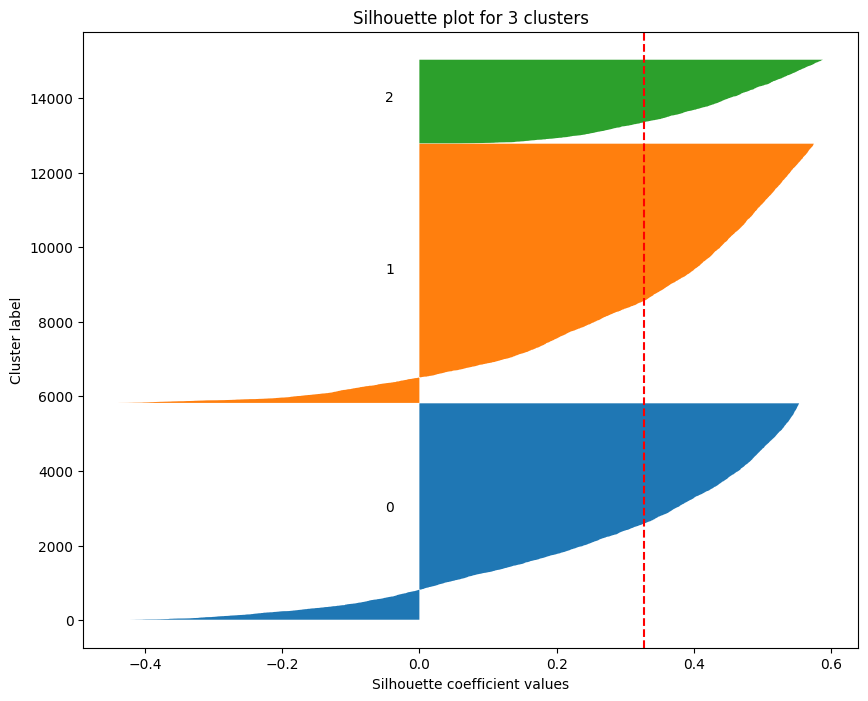

Silhouette score for n_clusters = 4: 0.2715


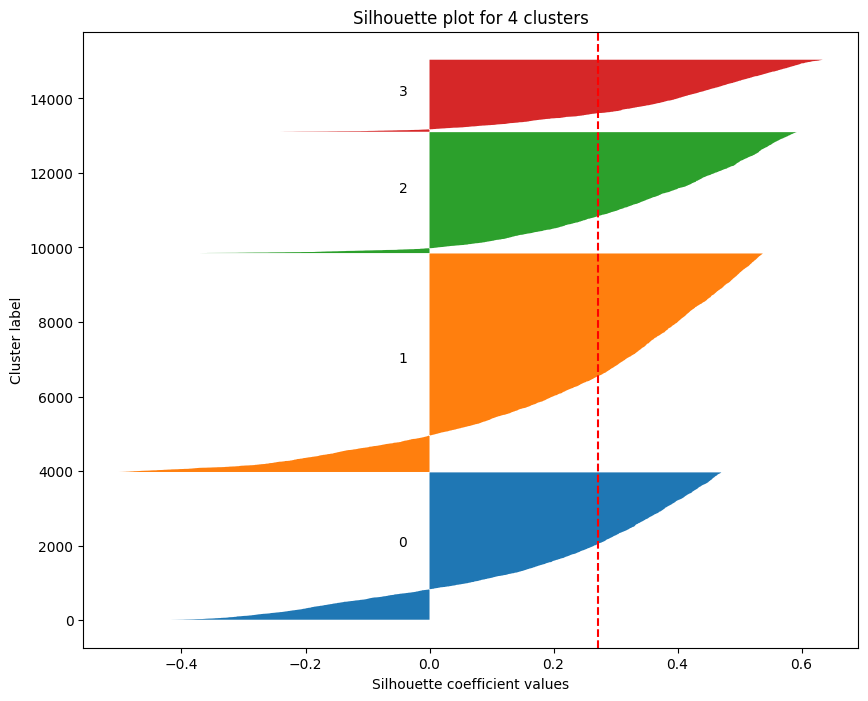

Silhouette score for n_clusters = 5: 0.2898


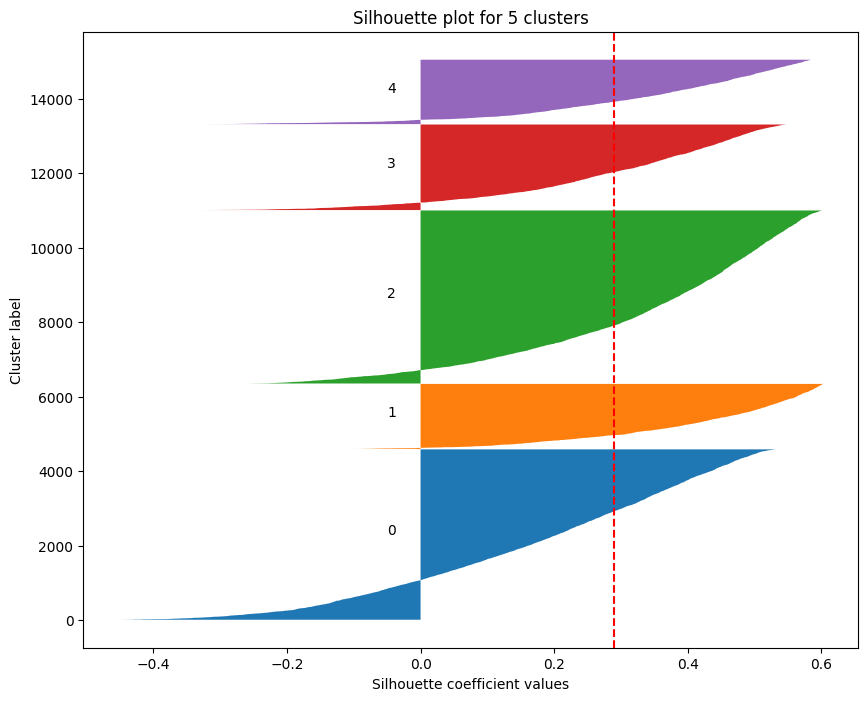

Silhouette score for n_clusters = 6: 0.2671


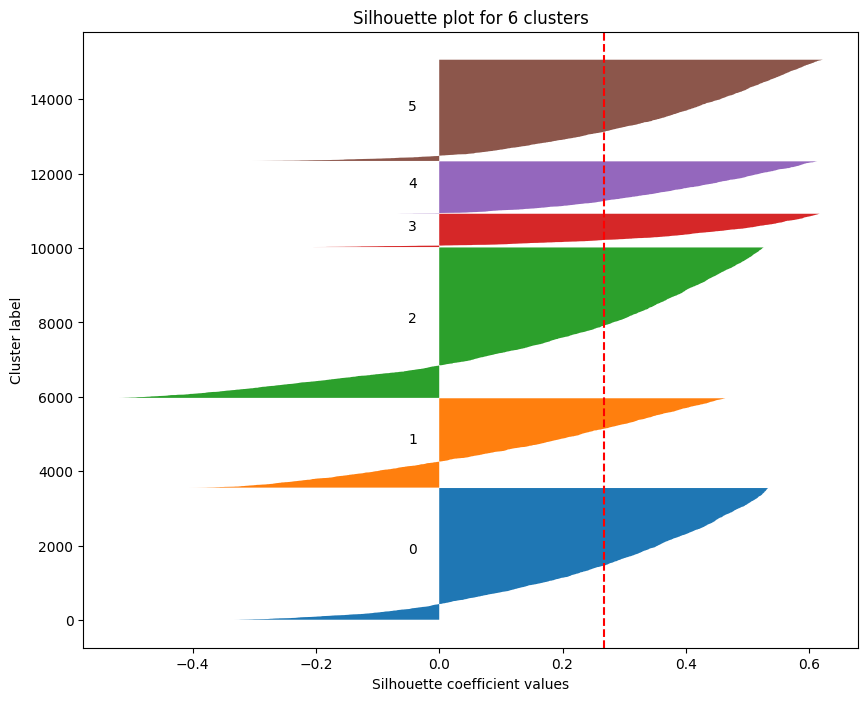

Linkage method: complete
Silhouette score for n_clusters = 2: 0.3858


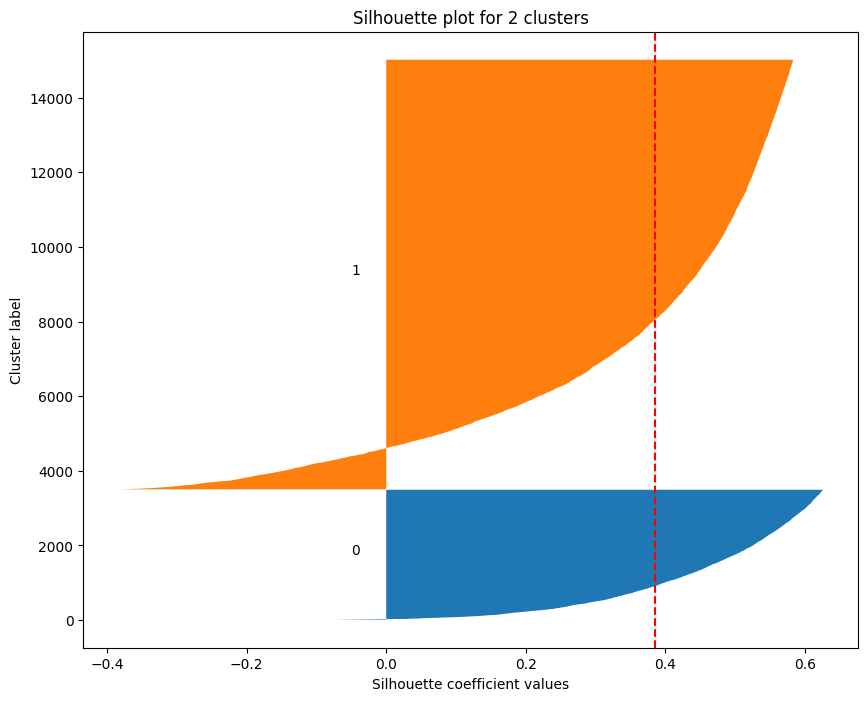

Silhouette score for n_clusters = 3: 0.3620


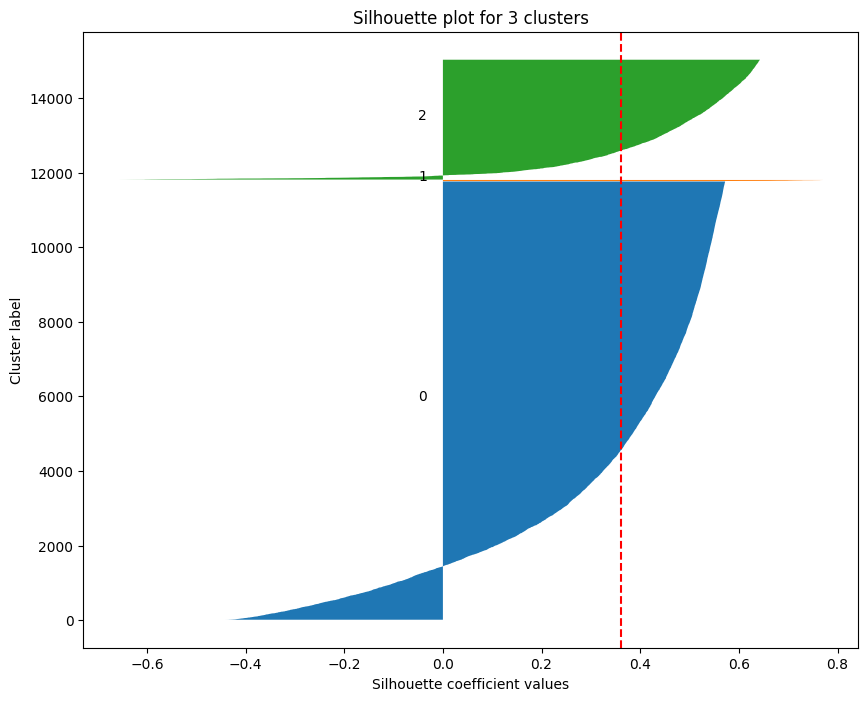

Silhouette score for n_clusters = 4: 0.1921


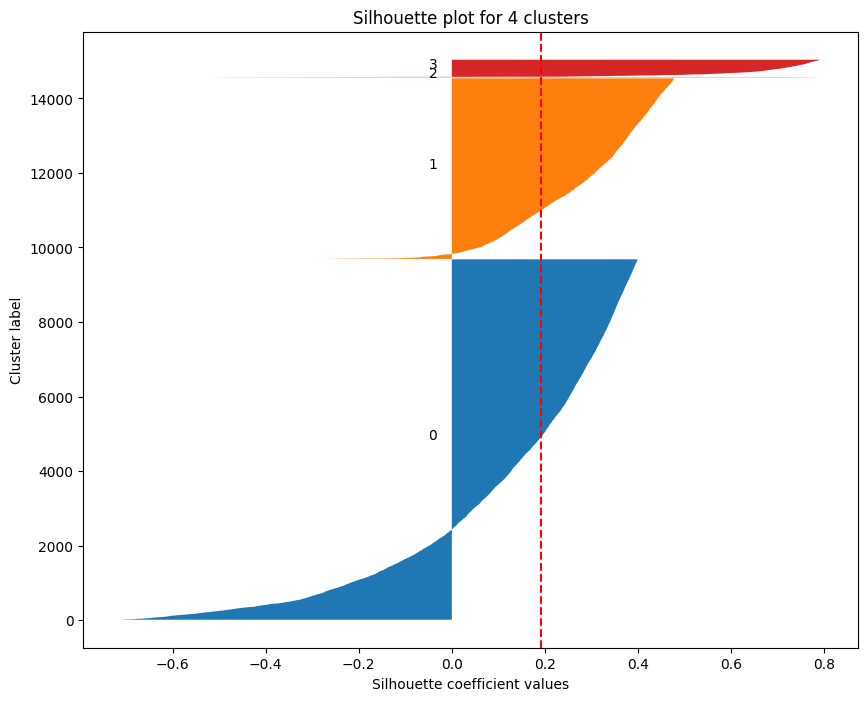

Silhouette score for n_clusters = 5: 0.3017


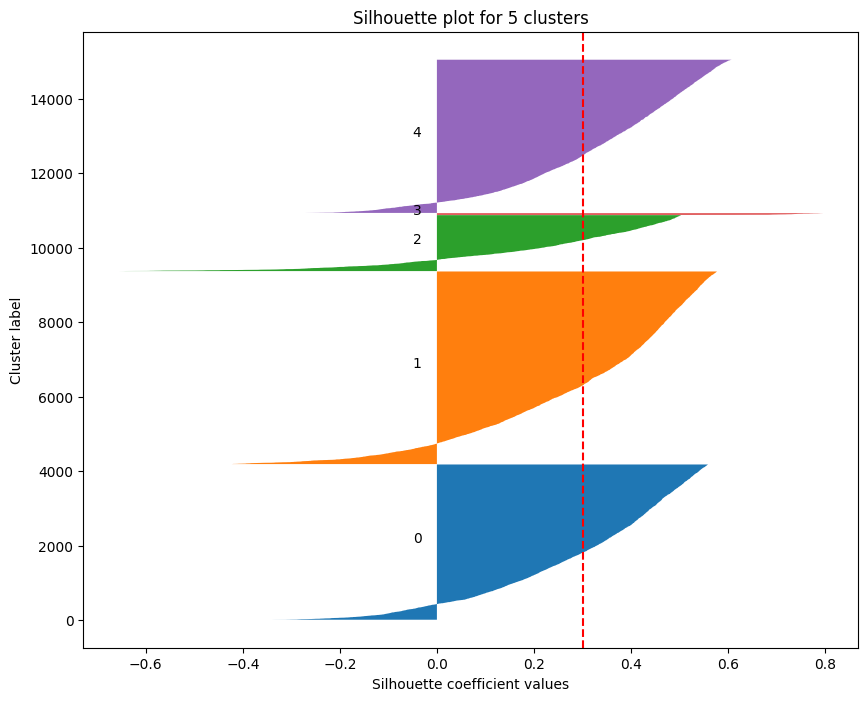

Silhouette score for n_clusters = 6: 0.2422


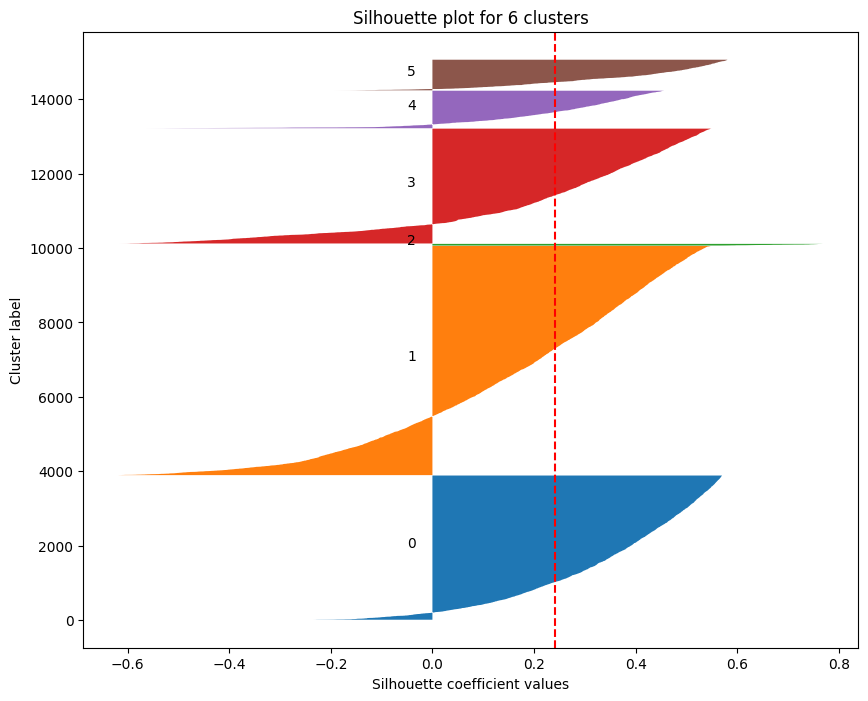

Linkage method: average
Silhouette score for n_clusters = 2: 0.8336


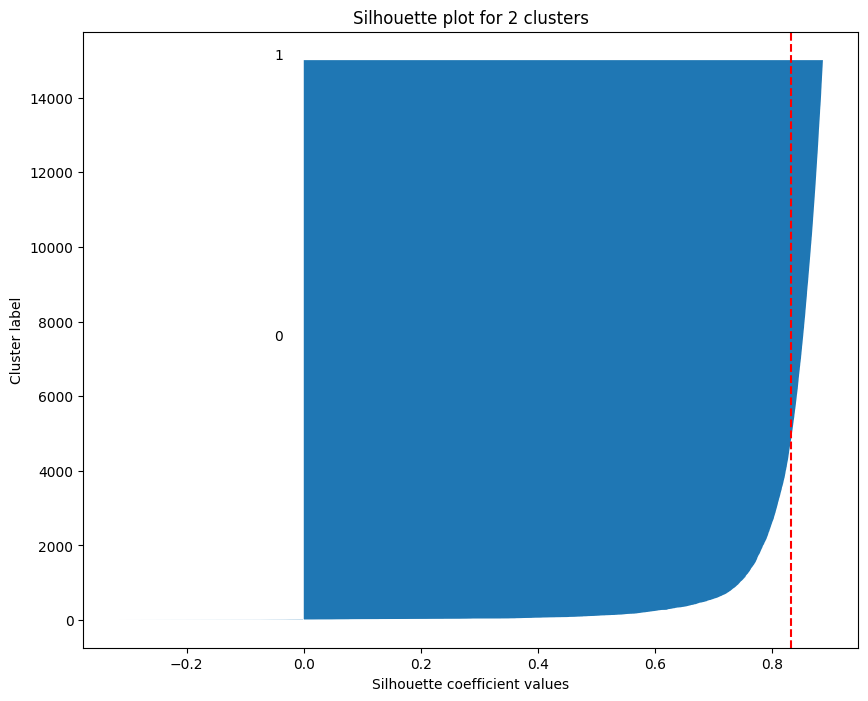

Silhouette score for n_clusters = 3: 0.4697


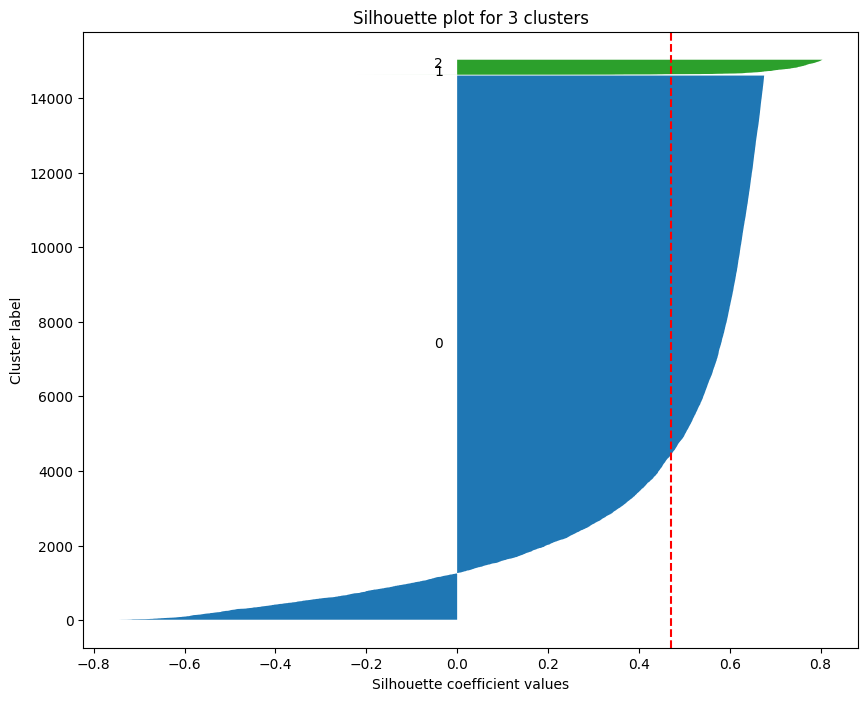

Silhouette score for n_clusters = 4: 0.2548


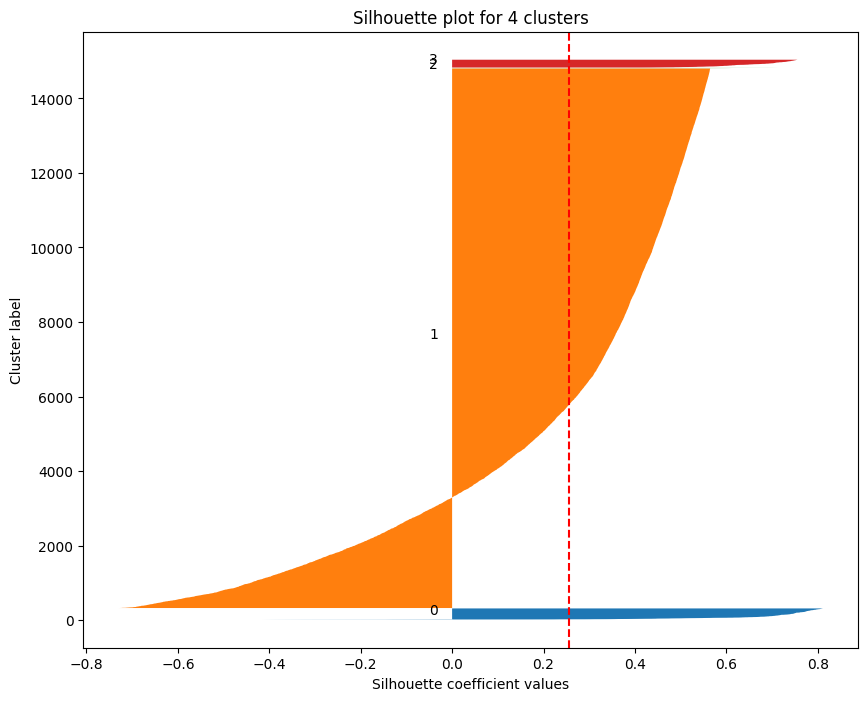

Silhouette score for n_clusters = 5: 0.3252


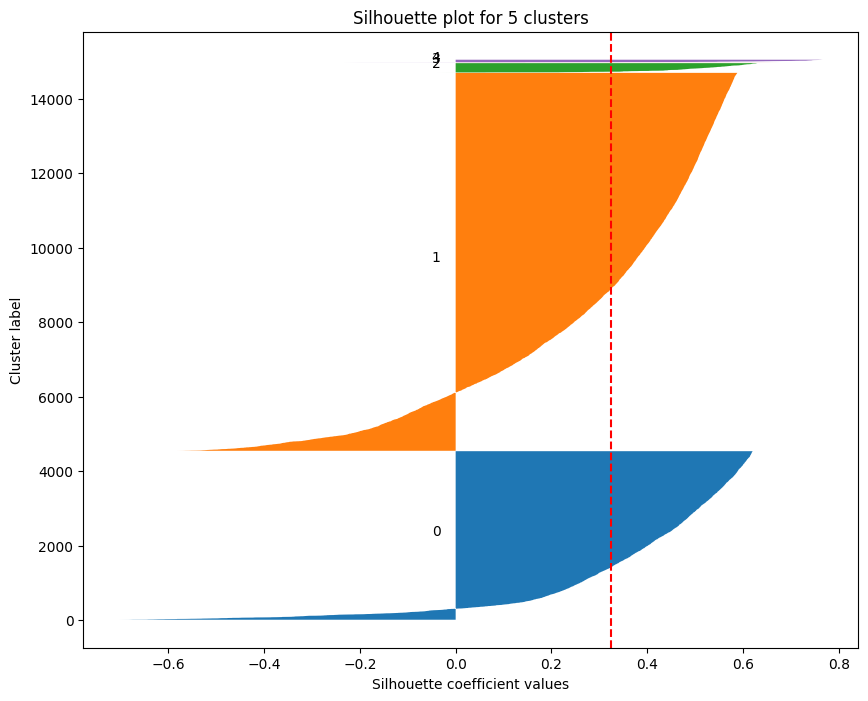

Silhouette score for n_clusters = 6: 0.2291


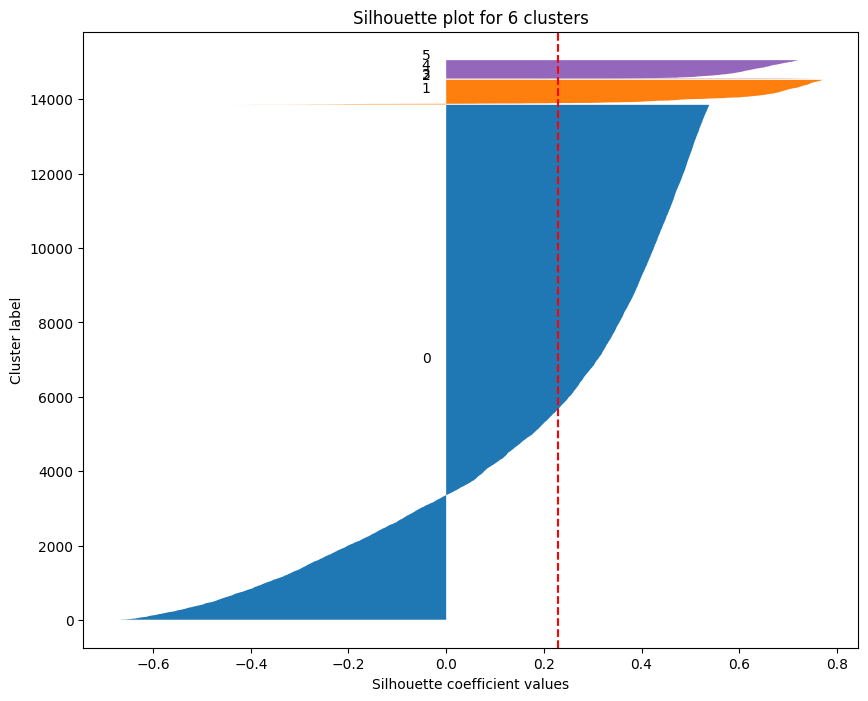

Linkage method: single
Silhouette score for n_clusters = 2: 0.8073


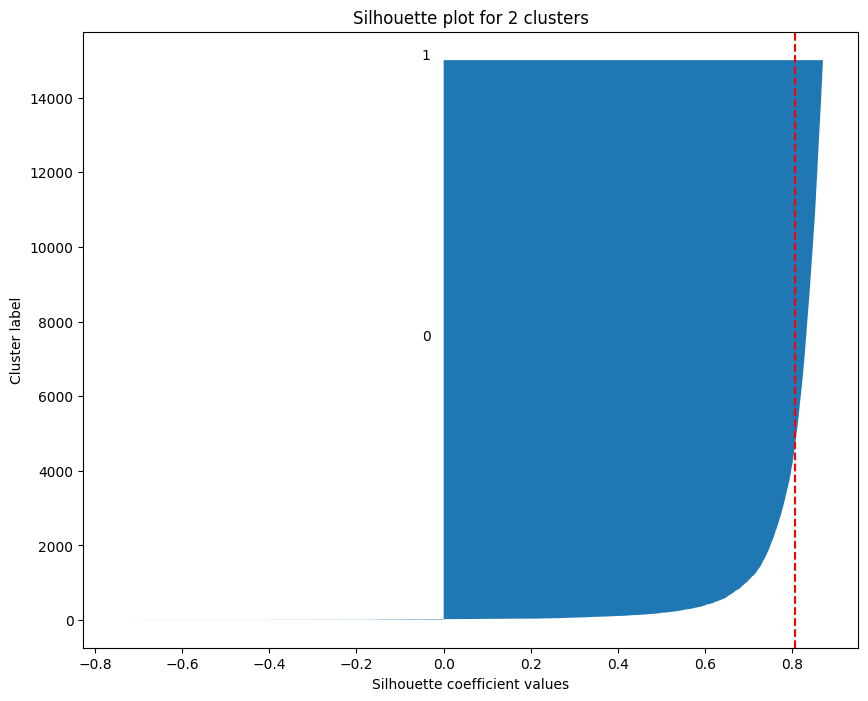

Silhouette score for n_clusters = 3: 0.6401


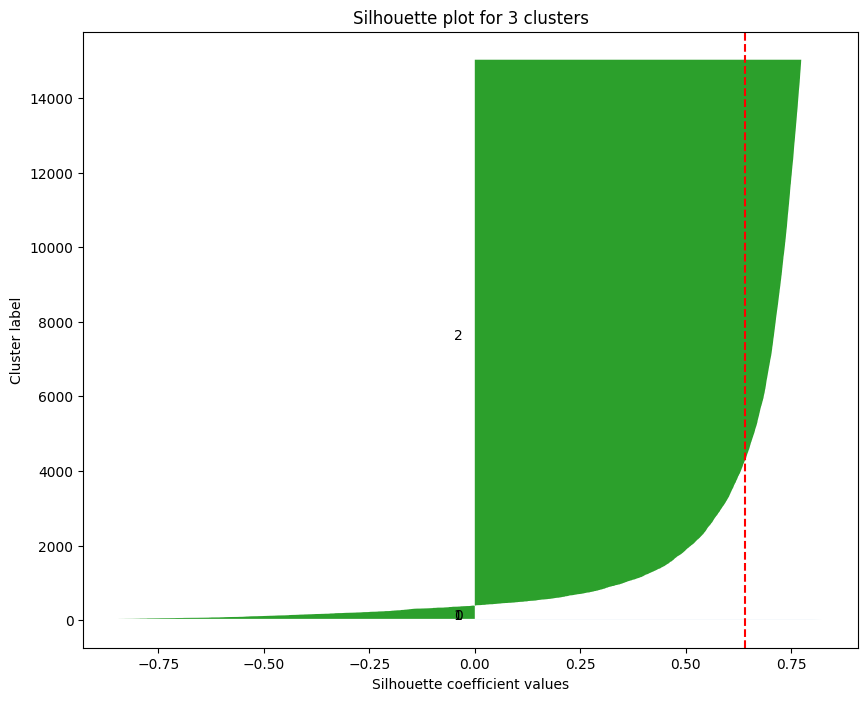

Silhouette score for n_clusters = 4: 0.4827


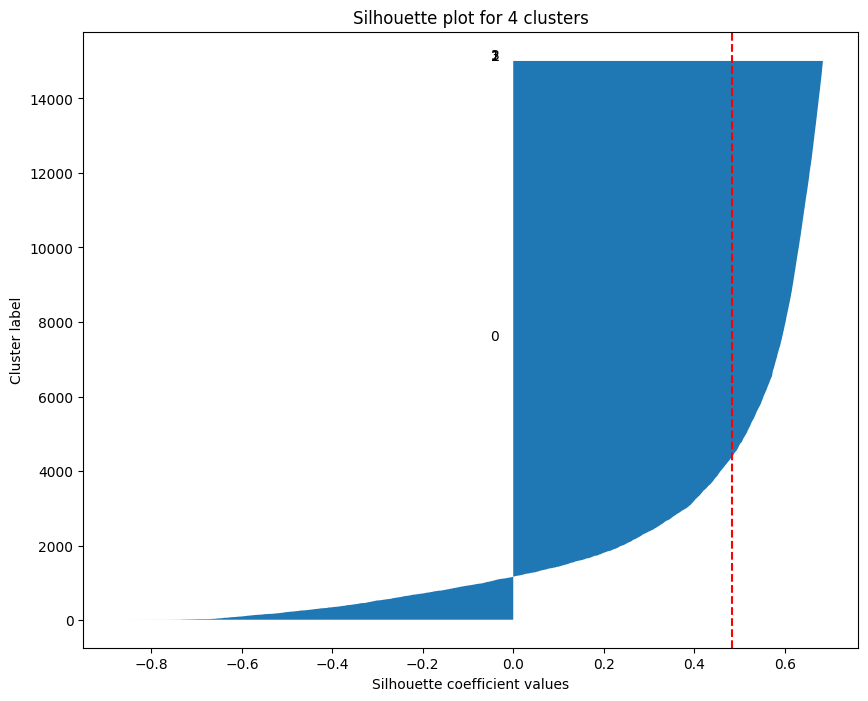

Silhouette score for n_clusters = 5: 0.5218


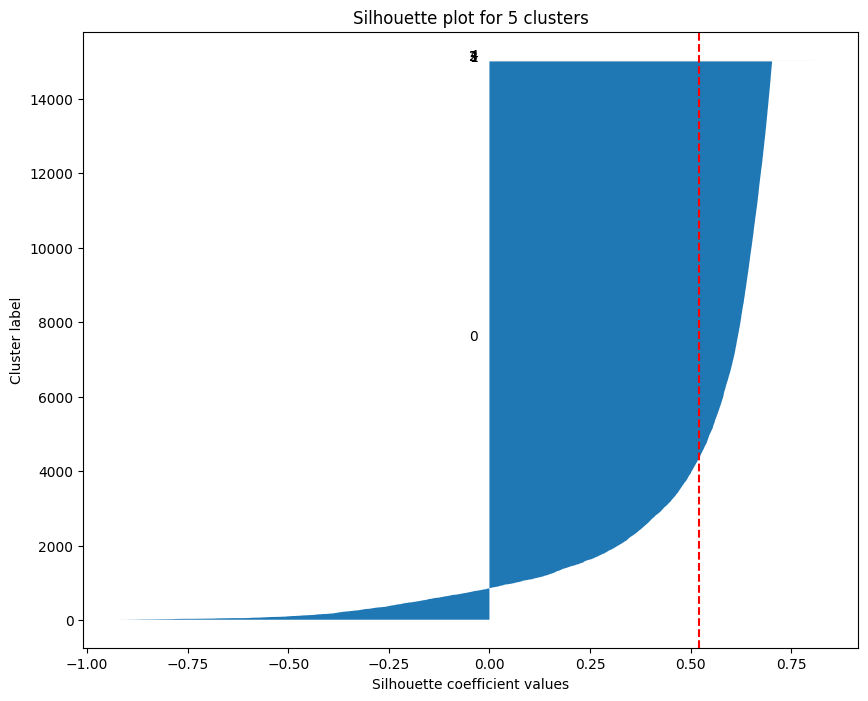

Silhouette score for n_clusters = 6: 0.5272


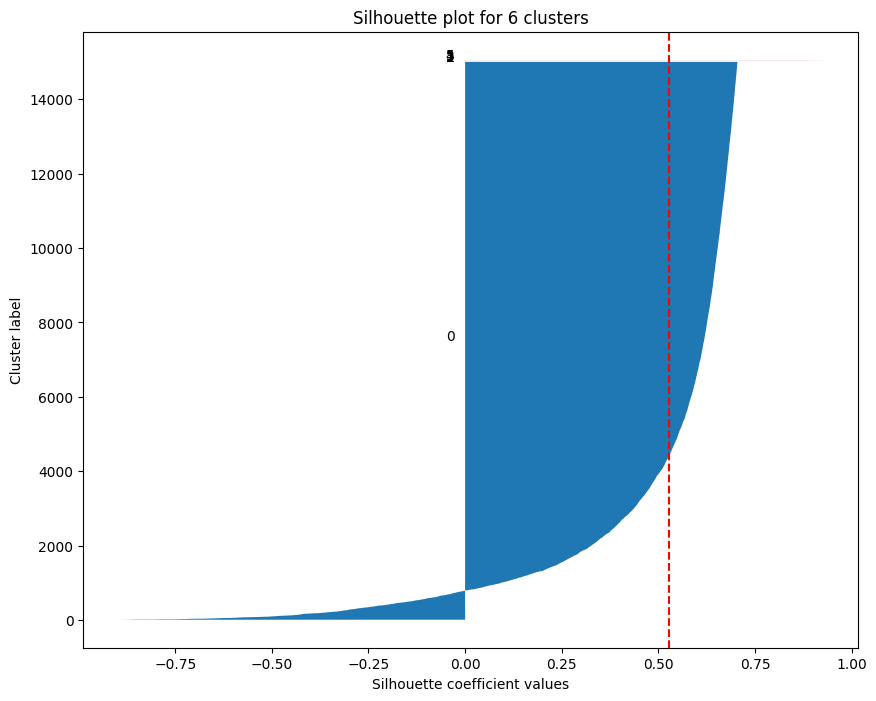

In [15]:

def plot_silhouette(n_clusters, cluster_labels, silhouette_vals, silhouette_avg):
    
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    plt.title(f"Silhouette plot for {n_clusters} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x = silhouette_avg, color = 'red', linestyle = '--')
    plt.show()


for method in linkage_methods:
    print(f"Linkage method: {method}")
    for n_clusters in range(2,7):
        sample_indices = np.random.choice(len(pca_features), size = sample_size, replace = False)
        pca_features_sampled = pca_features[sample_indices]
        
        agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        cluster_labels = agg.fit_predict(pca_features_sampled)
        silhouette_avg = silhouette_score(pca_features_sampled, cluster_labels)
        silhouette_vals = silhouette_samples(pca_features_sampled, cluster_labels)
        print(f"Silhouette score for n_clusters = {n_clusters}: {silhouette_avg:.4f}")
        plt.figure(figsize = (10,8))
        plot_silhouette(n_clusters, cluster_labels, silhouette_vals, silhouette_avg)


#### These silhouette plots add more to our story as we can now see the cluster groups.  Single linkage will not help any, as even though the silhouette coefficient scores are high overall, the cluster groups are much too imbalanced to show any meaningful relationships.  This same principle can also be applied to the plots shown for Average linkage as well; the distribution visually is quite poor.  When it comes to Complete linkage it gets better although the disparity still shows noticeably.  We will look at Complete linkage a little bit more before we completely discard it.  Ward linkage has the best distribution of its clusters (pretty easily), although its coefficient scores aren't amazing.  This will be the linkage method we prefer.  As far as noticeable n_clusters, 3-5 for Ward all have promise.  Let's keep going with our analysis and paring down our choices.

#### Now we will look at some pairplots looking at just Ward and Complete linkage methods, paring down to just a range of (2,8) to narrow our scope.  Let's see what the separation of clusters is and which n_clusters size will help us the most.

Plotting for n_clusters = 2, linkage method = ward


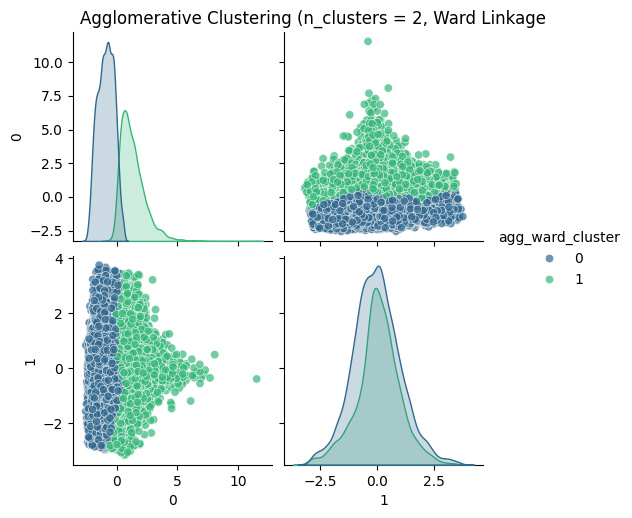

Plotting for n_clusters = 2, linkage method = complete


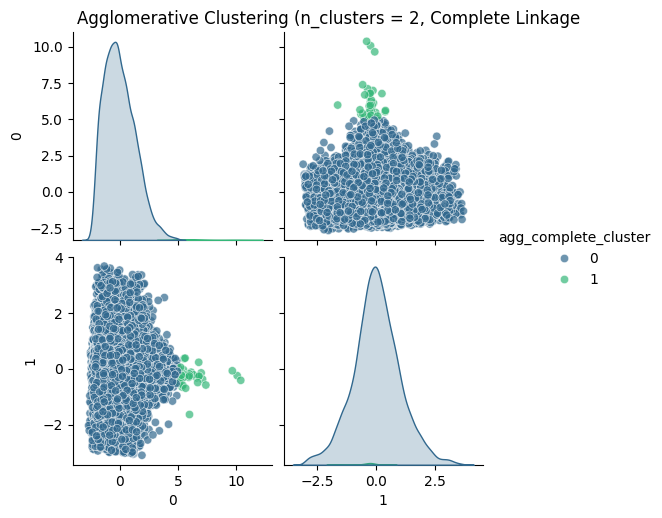

Plotting for n_clusters = 3, linkage method = ward


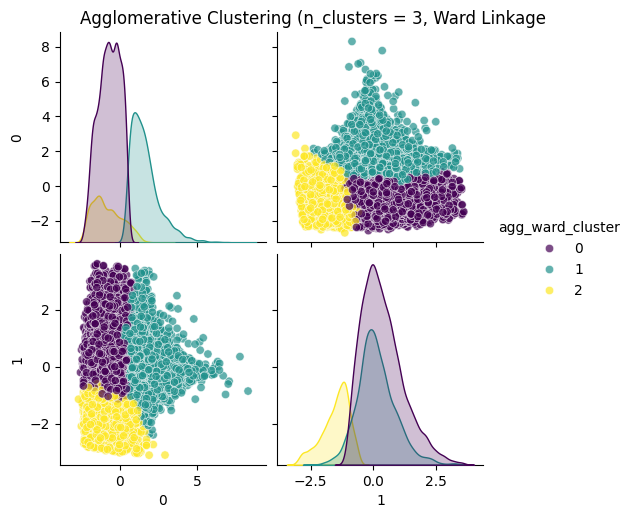

Plotting for n_clusters = 3, linkage method = complete


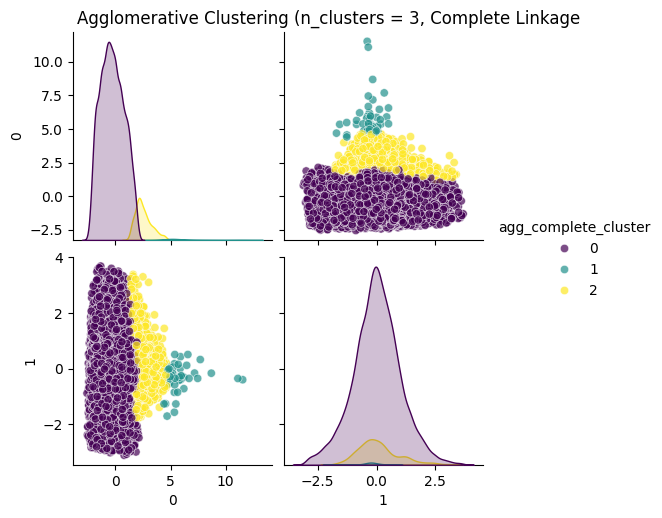

Plotting for n_clusters = 4, linkage method = ward


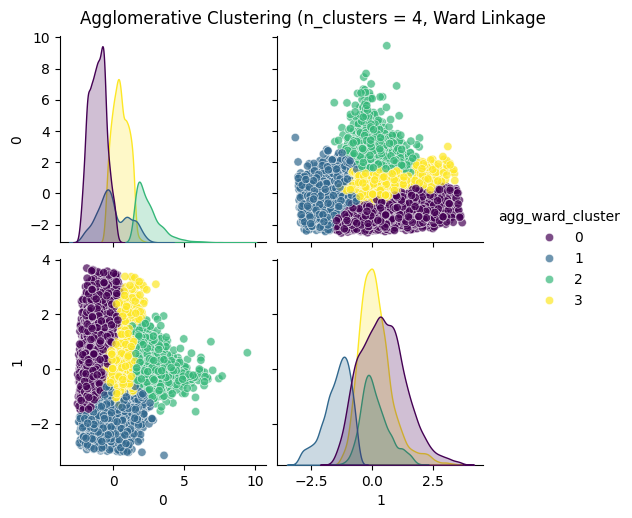

Plotting for n_clusters = 4, linkage method = complete


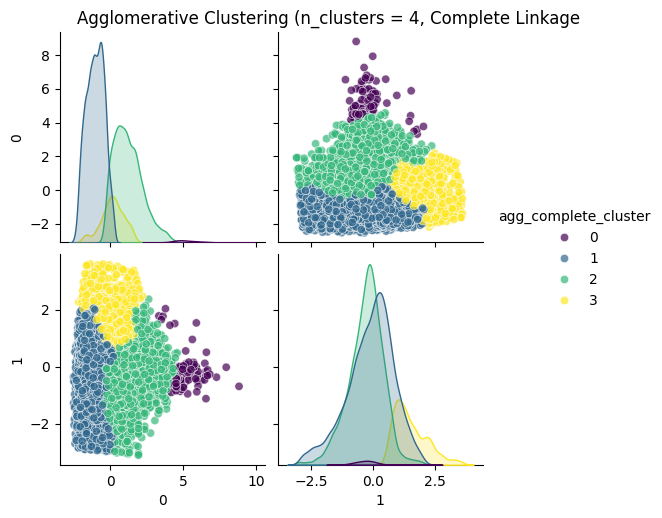

Plotting for n_clusters = 5, linkage method = ward


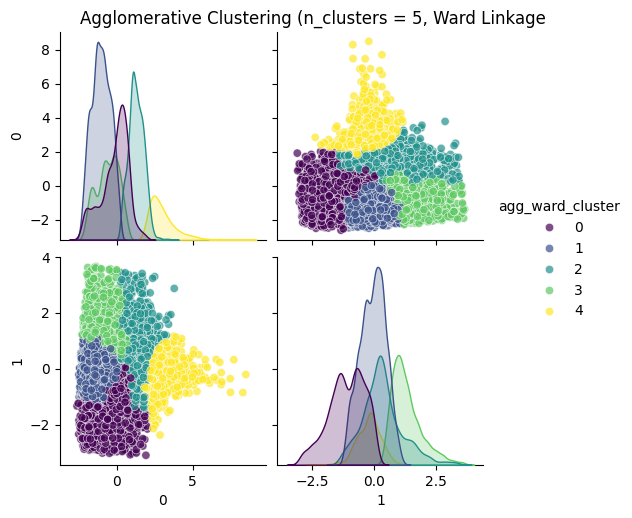

Plotting for n_clusters = 5, linkage method = complete


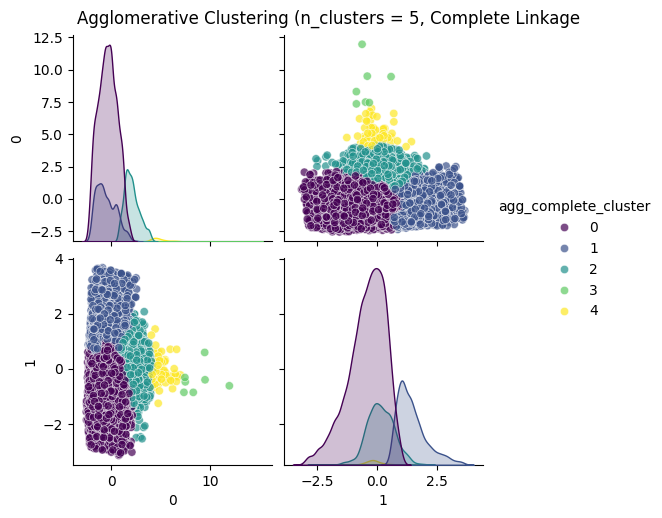

Plotting for n_clusters = 6, linkage method = ward


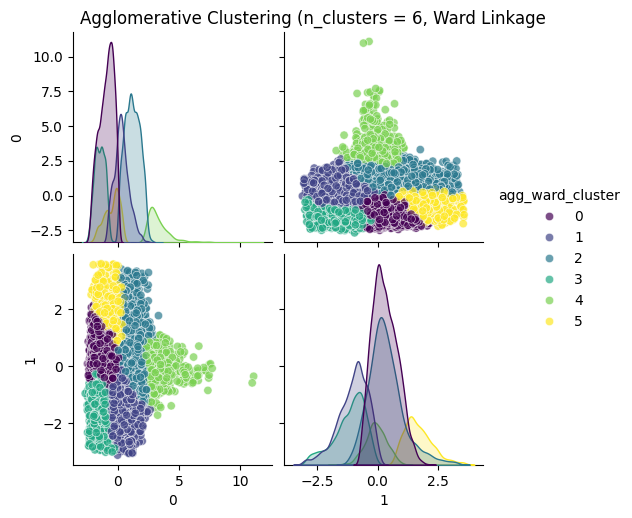

Plotting for n_clusters = 6, linkage method = complete


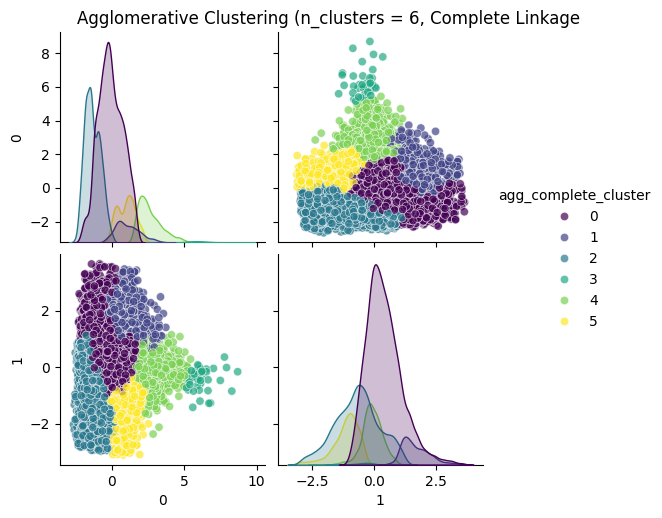

Plotting for n_clusters = 7, linkage method = ward


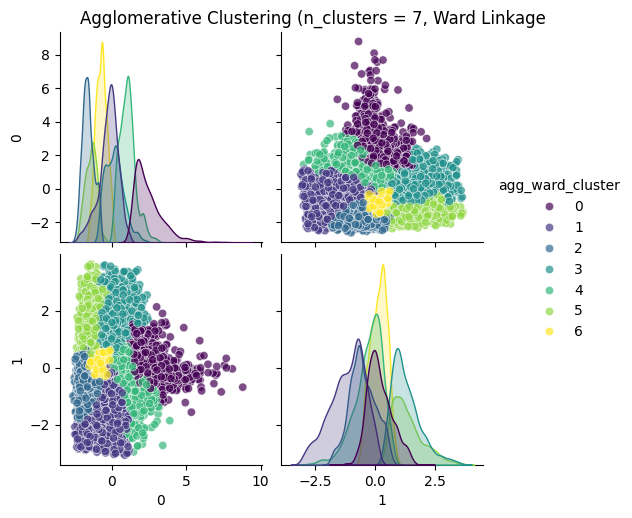

Plotting for n_clusters = 7, linkage method = complete


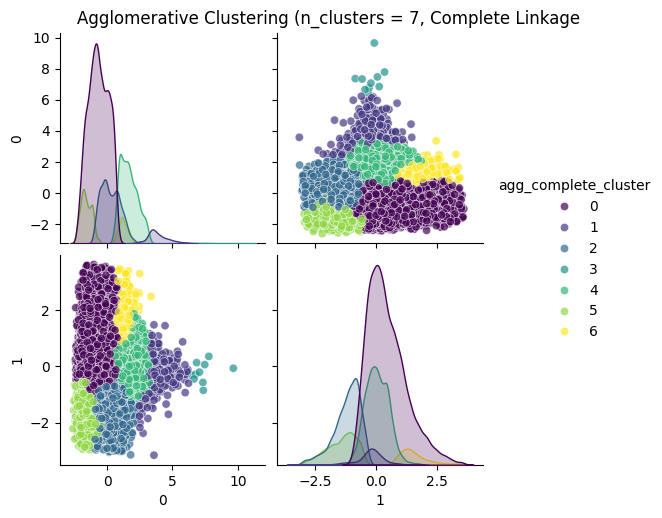

In [35]:
def agg_clustering_mod_sample(linkage, data, df, cluster_col_name, sample_size=15000, n_clusters=3):
    sample_indices = np.random.choice(len(data), size=sample_size, replace=False)
    sample_data = data[sample_indices]
    sample_df = df.iloc[sample_indices].reset_index(drop=True)
    
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    sample_df[cluster_col_name] = agg.fit_predict(sample_data)
    df[cluster_col_name] = -1
    
    df.loc[sample_indices, cluster_col_name] = sample_df[cluster_col_name]
    
    return df, sample_data, sample_df

results = {}
n_clusters_range = range(2,8)

pairplot_linkage_methods = ['ward', 'complete']

for n_clusters in n_clusters_range:
    results[n_clusters] = {}
    for linkage_method in pairplot_linkage_methods:
        agg_scaled, pca_features_sampled, agg_scaled_sampled = agg_clustering_mod_sample(linkage_method, pca_features, pd.DataFrame(pca_features), f'agg_{linkage_method}_cluster', sample_size=15000, n_clusters=n_clusters)
        results[n_clusters][linkage_method] = agg_scaled_sampled

def plot_pairplots(results, n_clusters_range, pairplot_linkage_methods):
    for n_clusters in n_clusters_range:
        for linkage_method in pairplot_linkage_methods:
            if linkage_method in results[n_clusters]:
                print(f"Plotting for n_clusters = {n_clusters}, linkage method = {linkage_method}")
                sns.pairplot(results[n_clusters][linkage_method], hue = f'agg_{linkage_method}_cluster', palette = 'viridis', diag_kind = 'kde', plot_kws = {'alpha' : 0.7})
                plt.suptitle(f'Agglomerative Clustering (n_clusters = {n_clusters}, {linkage_method.capitalize()} Linkage', y = 1.02)
                plt.show()
                
plot_pairplots(results, n_clusters_range, pairplot_linkage_methods)



#### 

#### Now let's look at some quick histplots for population size for each linkage method to see the normalization, we are looking for (as close as possible) the same population size in each cluster per linkage method.

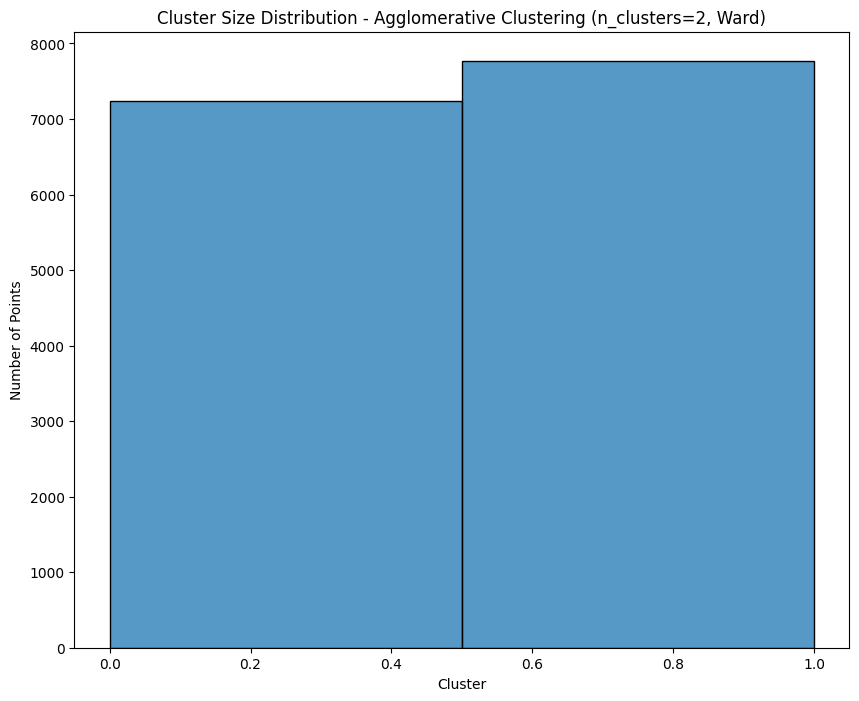

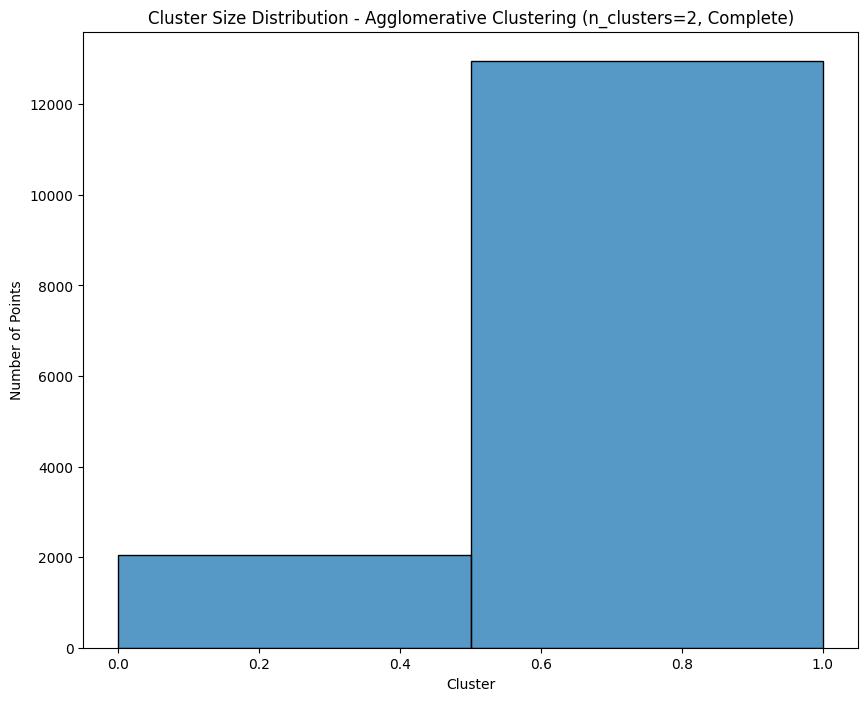

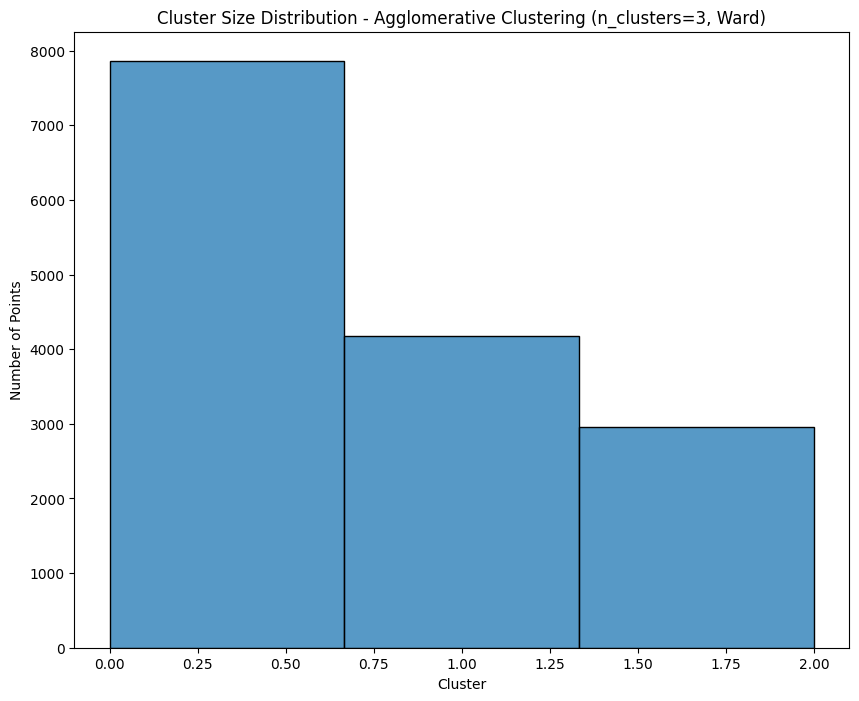

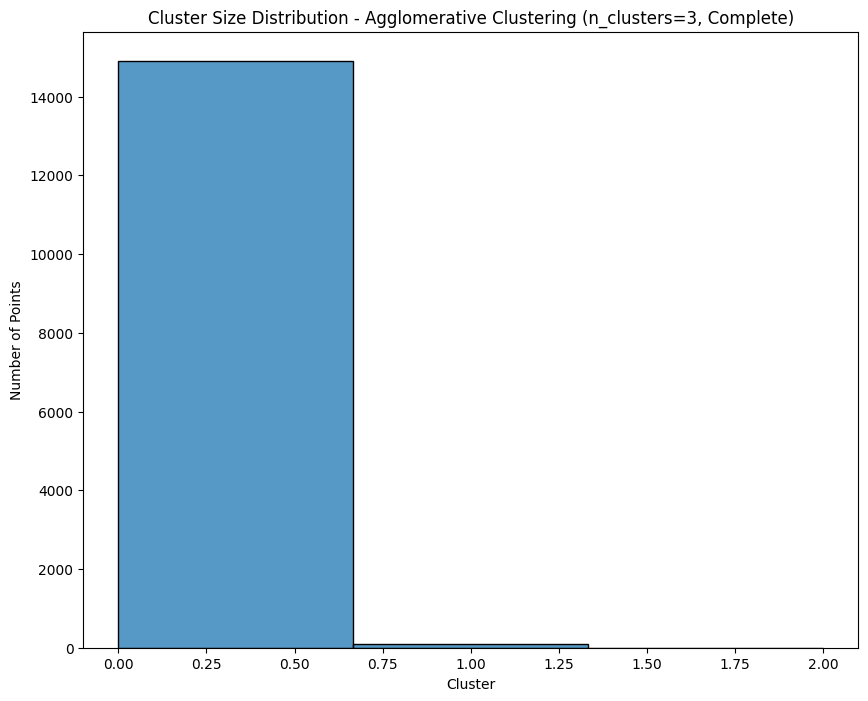

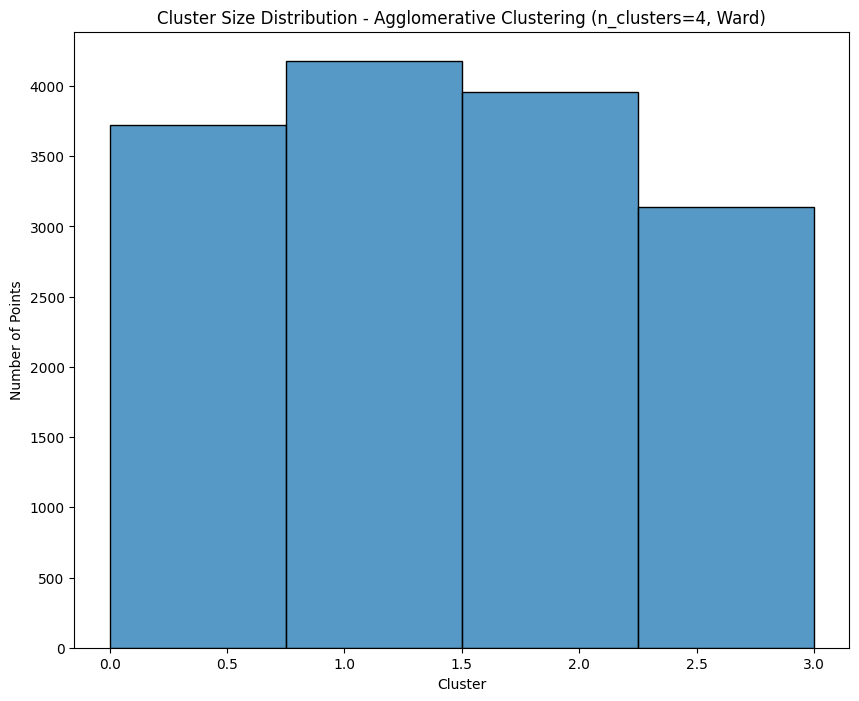

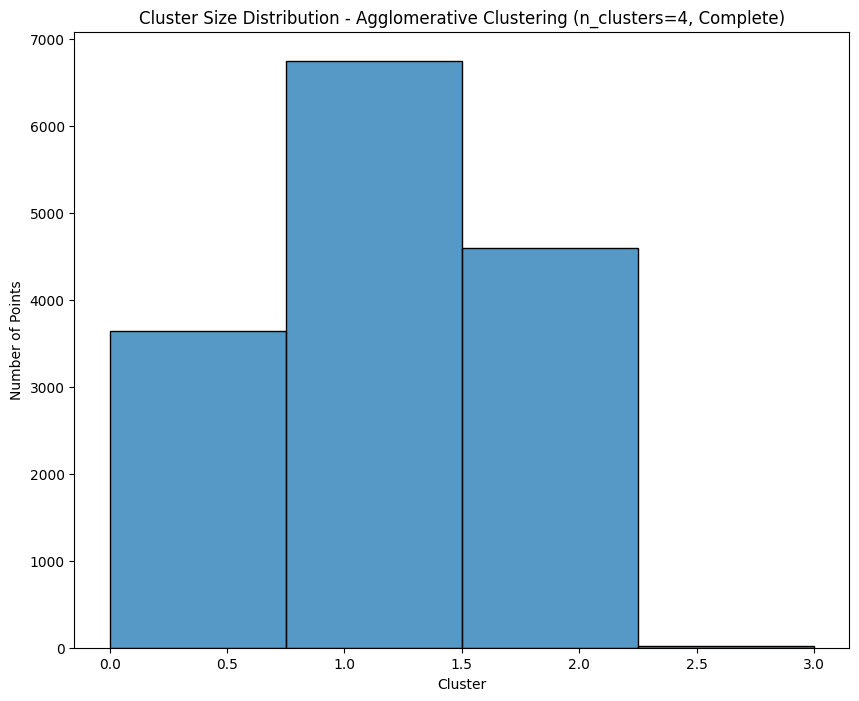

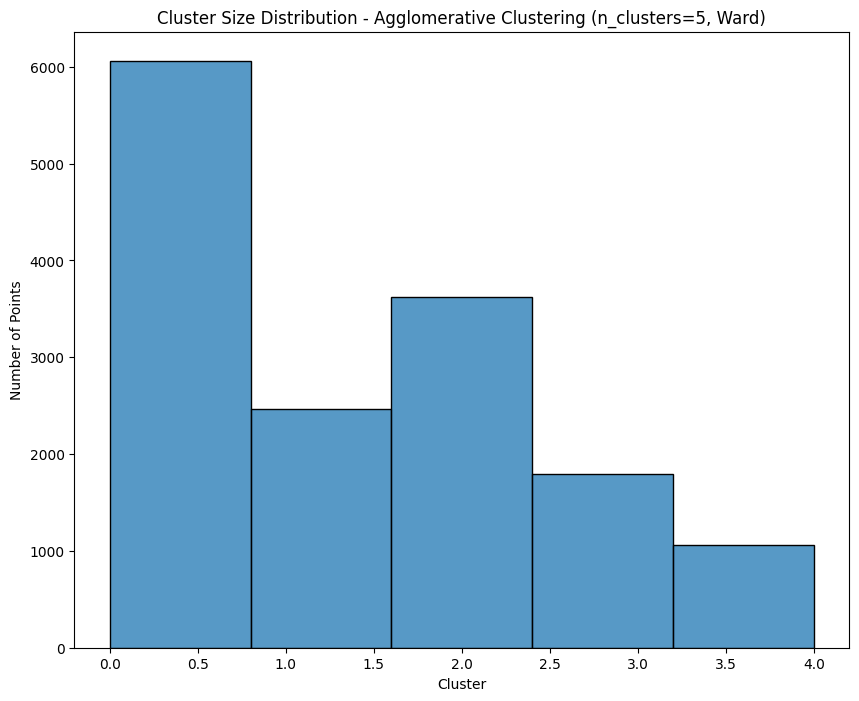

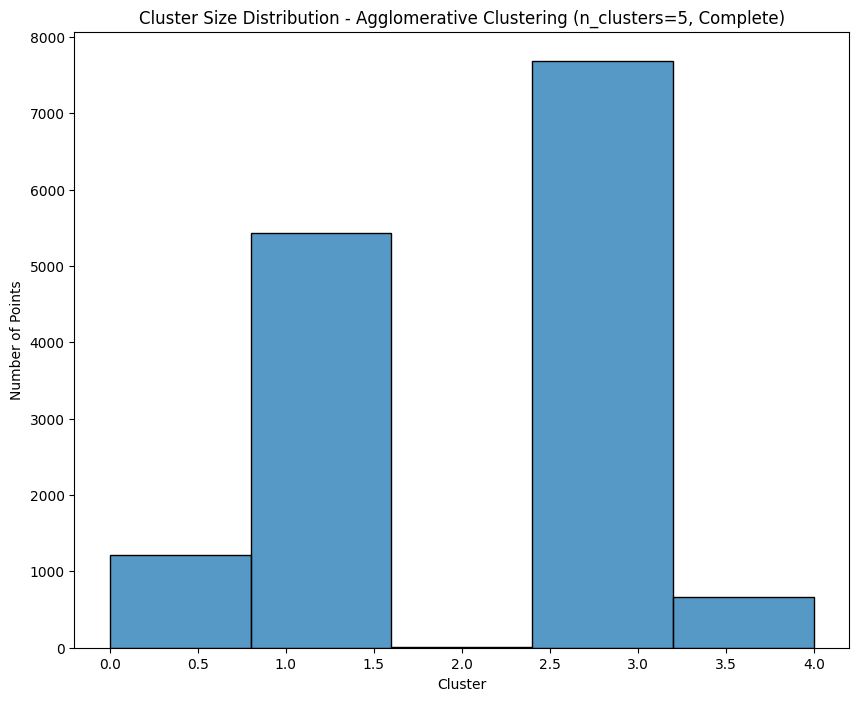

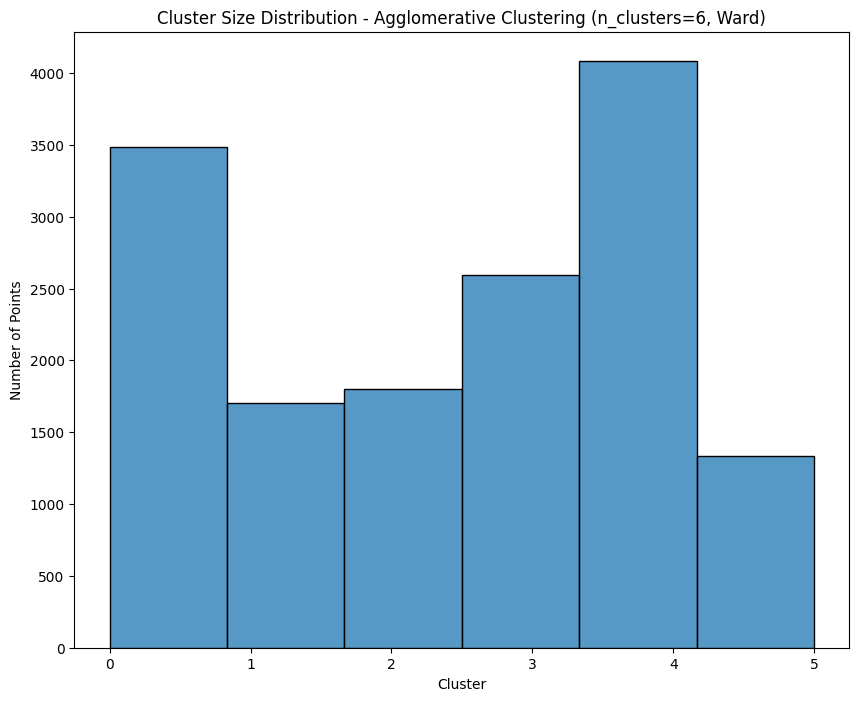

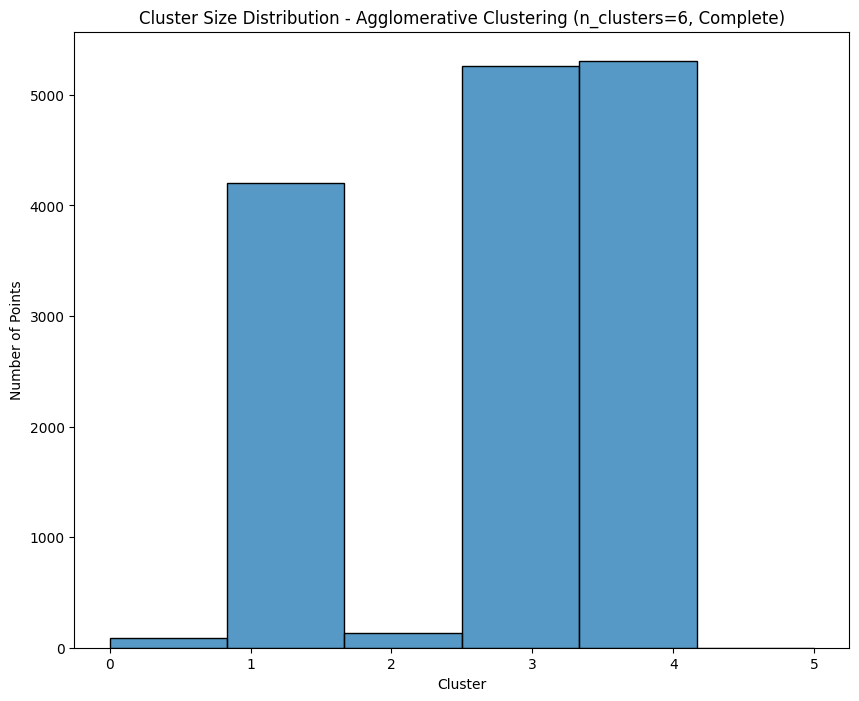

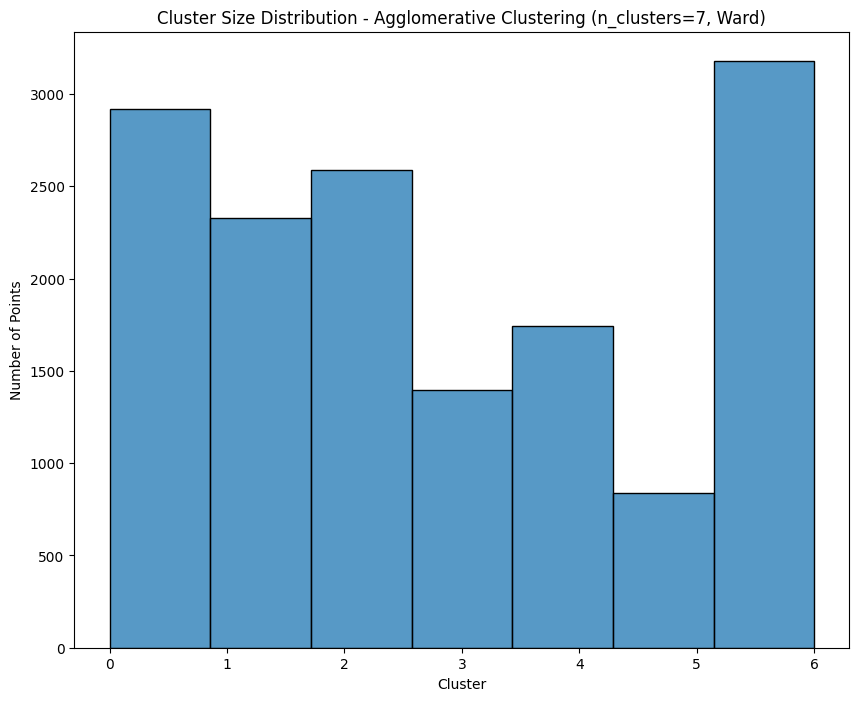

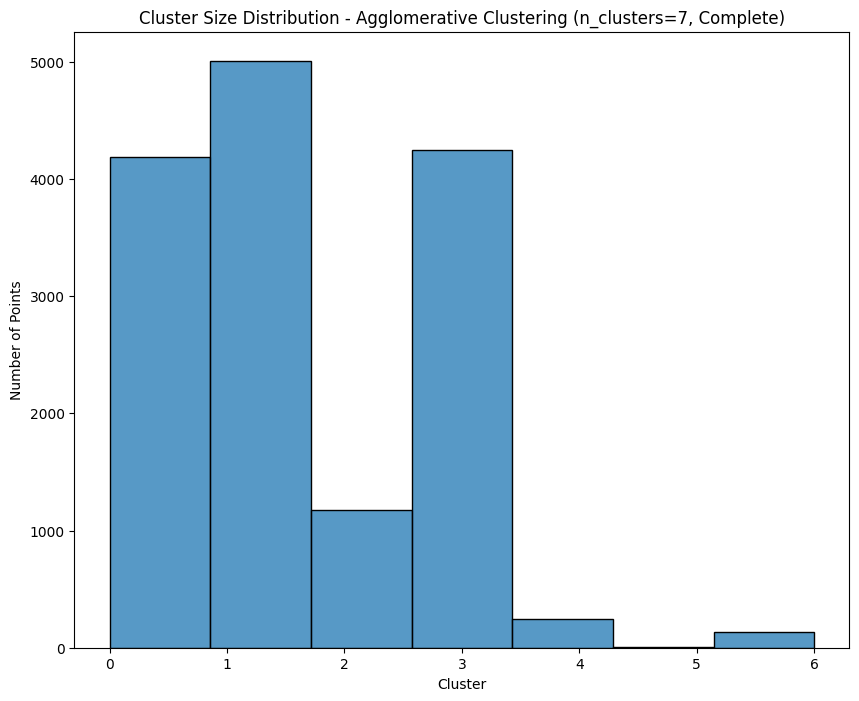

In [31]:
def sample_pca_features(pca_features, sample_size=15000, random_state=42):
    sample_indices = np.random.choice(len(pca_features), size=sample_size, replace=False)
    sample_data = pca_features[sample_indices]
    return sample_data, sample_indices

def perform_clustering_and_plot(pca_features, n_clusters_range, linkage_methods, sample_size, random_state):
    for n_clusters in n_clusters_range:
        for linkage_method in linkage_methods:
            
            pca_features_sampled, _ = sample_pca_features(pca_features, sample_size, random_state)
            
            agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            cluster_labels = agg.fit_predict(pca_features_sampled)
            
            
            plt.figure(figsize=(10, 8))
            sns.histplot(cluster_labels, bins=len(np.unique(cluster_labels)), kde=False)
            plt.title(f'Cluster Size Distribution - Agglomerative Clustering (n_clusters={n_clusters}, {linkage_method.capitalize()})')
            plt.xlabel('Cluster')
            plt.ylabel('Number of Points')
            plt.show()


n_clusters_range = range(2, 8)
linkage_methods = ['ward', 'complete']

# Perform clustering and plot histograms
perform_clustering_and_plot(pca_features, n_clusters_range, linkage_methods, sample_size, random_state)

#### MKDN for OBS (choose linkage method here)

#### Now let's look at a 3D render of our chosen optimal_k value and linkage method, while also taking a look at outliers as well in this section.